In [10]:
import numpy as np
import sys
import pyDOE as pyDOE
import corner
from sympy import symbols, Eq

In [11]:
# Parameters
n_params = 3
n_samples = 5000

# parameter ranges:
h = np.linspace(0.64, 0.80, n_samples)
ombh2 = np.linspace(0.0180, 0.0250, n_samples)
omch2 = np.linspace(0.050, 0.250, n_samples)

In [12]:
# LHS Grid
AllParams = np.vstack([h, ombh2, omch2])
lhd = pyDOE.lhs(n_params, samples=n_samples, criterion=None)      # np.array,scales all the variable ranges from zero to one 
index = (lhd*n_samples).astype(int)                               # array of random indices, size of n_samples

AllCombs = np.zeros((n_samples, n_params))
for i in range(n_params):
    AllCombs[:, i] = AllParams[i][index[:, i]]
    
print(np.shape(AllCombs))
print(np.shape(AllParams))
print(type(AllParams))

(5000, 3)
(3, 5000)
<class 'numpy.ndarray'>


In [13]:
params = {'h': AllCombs[:, 0],
          'omega_b': AllCombs[:, 1],
          'omega_cdm': AllCombs[:, 2],
}

In [14]:
print(np.shape(params['h']))
print(np.size(AllCombs))
print(type(params))

(5000,)
15000
<class 'dict'>


In [15]:
np.savez('LHS_params_3dim5000.npz', **params)       # Save several arrays into a single file in uncompressed .npz format.

In [16]:
print(params['h'])
print(params['omega_b'])
print(params['omega_cdm'])
print(np.shape(params['h']))

[0.7015163  0.64307261 0.66784557 ... 0.7594799  0.69361072 0.65366673]
[0.02092098 0.01833747 0.01811342 ... 0.02331406 0.0210078  0.02242208]
[0.17426485 0.16678336 0.12237447 ... 0.09276855 0.05224045 0.18358672]
(5000,)


In [17]:
print(AllParams)
print(np.shape(AllParams))
AllParams_tran = np.transpose(AllParams)
print(np.shape(AllParams_tran))

[[0.64       0.64003201 0.64006401 ... 0.79993599 0.79996799 0.8       ]
 [0.018      0.0180014  0.0180028  ... 0.0249972  0.0249986  0.025     ]
 [0.05       0.05004001 0.05008002 ... 0.24991998 0.24995999 0.25      ]]
(3, 5000)
(5000, 3)


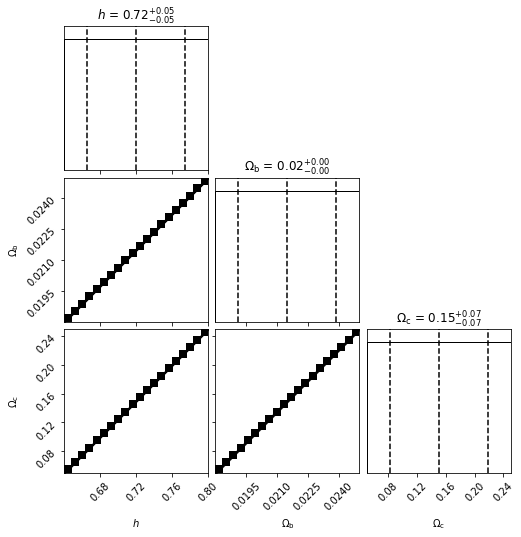

In [18]:
# Plot it.
figure = corner.corner(AllParams_tran, labels=[r"$h$", r"$\Omega_{\mathrm{b}}$", r"$\Omega_{\mathrm{c}}$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})